In [2]:
import numpy as np
import pandas as pd
import requests
import json
import time
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
df=pd.DataFrame(columns=["age_range","outcome","officer_defined_ethnicity",
                         "gender","datetime","object_of_search","self_defined_ethnicity"])

C:\Users\Akinbola\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
url="https://data.police.uk/api/forces"
response_forces =requests.get(url).json()
response_forces

[{'id': 'avon-and-somerset', 'name': 'Avon and Somerset Constabulary'},
 {'id': 'bedfordshire', 'name': 'Bedfordshire Police'},
 {'id': 'cambridgeshire', 'name': 'Cambridgeshire Constabulary'},
 {'id': 'cheshire', 'name': 'Cheshire Constabulary'},
 {'id': 'city-of-london', 'name': 'City of London Police'},
 {'id': 'cleveland', 'name': 'Cleveland Police'},
 {'id': 'cumbria', 'name': 'Cumbria Constabulary'},
 {'id': 'derbyshire', 'name': 'Derbyshire Constabulary'},
 {'id': 'devon-and-cornwall', 'name': 'Devon & Cornwall Police'},
 {'id': 'dorset', 'name': 'Dorset Police'},
 {'id': 'durham', 'name': 'Durham Constabulary'},
 {'id': 'dyfed-powys', 'name': 'Dyfed-Powys Police'},
 {'id': 'essex', 'name': 'Essex Police'},
 {'id': 'gloucestershire', 'name': 'Gloucestershire Constabulary'},
 {'id': 'greater-manchester', 'name': 'Greater Manchester Police'},
 {'id': 'gwent', 'name': 'Gwent Police'},
 {'id': 'hampshire', 'name': 'Hampshire Constabulary'},
 {'id': 'hertfordshire', 'name': 'Hertford

In [4]:
response_forces[0]['id']

'avon-and-somerset'

In [5]:
title_append=[]
for m in range(len(response_forces)):
    #print(response[j])
    for id in response_forces[m]:
        title_id=response_forces[m]['id']
    title_append.append(response_forces[m]['id'])
        
        
title_append 

['avon-and-somerset',
 'bedfordshire',
 'cambridgeshire',
 'cheshire',
 'city-of-london',
 'cleveland',
 'cumbria',
 'derbyshire',
 'devon-and-cornwall',
 'dorset',
 'durham',
 'dyfed-powys',
 'essex',
 'gloucestershire',
 'greater-manchester',
 'gwent',
 'hampshire',
 'hertfordshire',
 'humberside',
 'kent',
 'lancashire',
 'leicestershire',
 'lincolnshire',
 'merseyside',
 'metropolitan',
 'norfolk',
 'north-wales',
 'north-yorkshire',
 'northamptonshire',
 'northumbria',
 'nottinghamshire',
 'northern-ireland',
 'south-wales',
 'south-yorkshire',
 'staffordshire',
 'suffolk',
 'surrey',
 'sussex',
 'thames-valley',
 'warwickshire',
 'west-mercia',
 'west-midlands',
 'west-yorkshire',
 'wiltshire']

In [6]:
# exmaplesforces="cleveland" you can use id of the different forces gotten above
forces=input('enter the police station you want to compare:')
#date="2020-01"
date =str(input('enter  end date(yyyy-mm):'))


urls="https://data.police.uk/api/stops-force?force="+ forces + "&date=" + date
#https://data.police.uk/api/stops-force?force=avon-and-somerset&date=2017-01
response =requests.get(urls).json()

for j in range(len(response)):
    age_range=response[j]['age_range']
    outcome=response[j]['outcome']
    officer_defined_ethnicity=response[j]['officer_defined_ethnicity']
    gender=response[j]['gender']
    datetime=response[j]['datetime']
    datetime=str(datetime).split("T")[0]
    object_of_search=response[j]['object_of_search']
    self_defined_ethnicity=response[j]['self_defined_ethnicity']
                     
    #print(age_range)
    #print(outcome)
    #print(officer_defined_ethnicity)
    df=df.append({'age_range':age_range,'outcome':outcome, 
                  'officer_defined_ethnicity':officer_defined_ethnicity,'gender':gender,'datetime':datetime,
                  'object_of_search':object_of_search,'self_defined_ethnicity':self_defined_ethnicity,
                  
                  
                  
                 }, ignore_index=True)
    


enter the police station you want to compare:suffolk
enter  end date(yyyy-mm):2020-01


In [7]:
df

,age_range,outcome,officer_defined_ethnicity,gender,datetime,object_of_search,self_defined_ethnicity
0,25-34,Arrest,White,Male,2020-01-01,Controlled drugs,Other ethnic group - Not stated
1,18-24,A no further action disposal,White,Male,2020-01-02,Anything to threaten or harm anyone,White - English/Welsh/Scottish/Northern Irish/...
2,10-17,A no further action disposal,Other,Male,2020-01-03,Article for use in theft,Other ethnic group - Not stated
3,18-24,A no further action disposal,White,Male,2020-01-02,Controlled drugs,Other ethnic group - Not stated
4,10-17,A no further action disposal,White,Male,2020-01-03,Controlled drugs,Other ethnic group - Not stated
...,...,...,...,...,...,...,...
275,10-17,A no further action disposal,White,Male,2020-01-29,Controlled drugs,White - English/Welsh/Scottish/Northern Irish/...
276,18-24,A no further action disposal,White,Male,2020-01-19,Controlled drugs,White - Any other White background
277,18-24,A no further action disposal,White,Male,2020-01-19,Controlled drugs,White - Any other White background
278,10-17,A no further action disposal,Other,Male,2020-01-19,Controlled drugs,Mixed/Multiple ethnic groups - Any other Mixed...


In [5]:
options = ['10-17','18-24']
# selecting rows based on condition of the tennegars
teengare_drive = df[df['age_range'].isin(options)]
teengare_drive

,age_range,outcome,officer_defined_ethnicity,gender,datetime,object_of_search,self_defined_ethnicity
1,18-24,A no further action disposal,None,Male,2020-01-01,Controlled drugs,None
2,18-24,A no further action disposal,None,Male,2020-01-01,Controlled drugs,None
7,18-24,Arrest,White,Male,2020-01-03,Controlled drugs,White - English/Welsh/Scottish/Northern Irish/...
11,18-24,A no further action disposal,White,Male,2020-01-04,Controlled drugs,White - English/Welsh/Scottish/Northern Irish/...
15,18-24,Arrest,Black,Male,2020-01-04,Offensive weapons,Black/African/Caribbean/Black British - Caribbean
...,...,...,...,...,...,...,...
161,18-24,Arrest,White,Male,2020-01-29,None,White - English/Welsh/Scottish/Northern Irish/...
162,18-24,A no further action disposal,White,Female,2020-01-29,Offensive weapons,White - English/Welsh/Scottish/Northern Irish/...
176,18-24,,Asian,Male,2020-01-30,None,Asian/Asian British - Any other Asian background
177,18-24,A no further action disposal,White,Male,2020-01-30,Anything to threaten or harm anyone,None


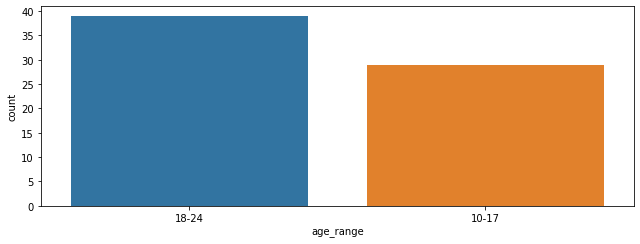

In [6]:
plt.rcParams["figure.figsize"] = [9.00, 3.50]
plt.rcParams["figure.autolayout"] = True



ax = sns.countplot(x="age_range", data=teengare_drive)

plt.show()

In [19]:
def func1(x,y):
    options = ['10-17','18-24']
    # selecting rows based on condition of the tennegars
    diagmragm1 = df[df['age_range'].isin(options)]
    plt.rcParams["figure.figsize"] = [x, y]
    plt.rcParams["figure.autolayout"] = True
    ax = sns.countplot(x="age_range", data=diagmragm1)
    plt.show()
    
    
    return   

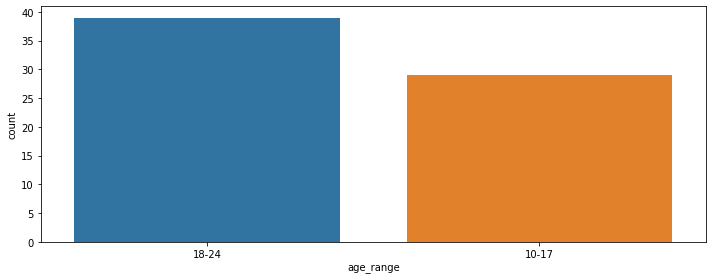

In [22]:
func1(10.00,4.0)

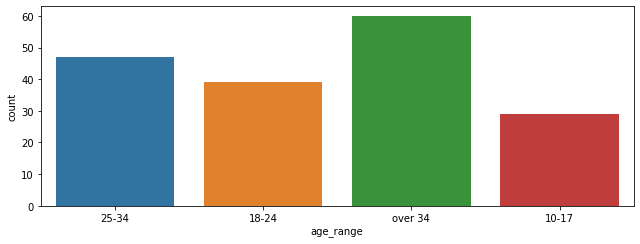

In [9]:
#the breakdown of age for cleveland-stop-and-search from the month of july 2020 t0 Apr2021
ax = sns.countplot(x="age_range", data=df)

plt.show()

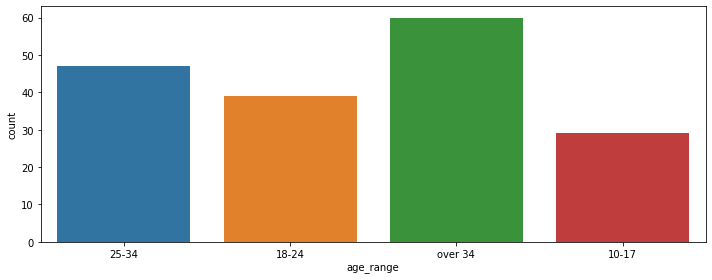

In [24]:
def func2(data2):
    ax = sns.countplot(x="age_range", data=data2)
    plt.show()
    return 
func2(df)

    

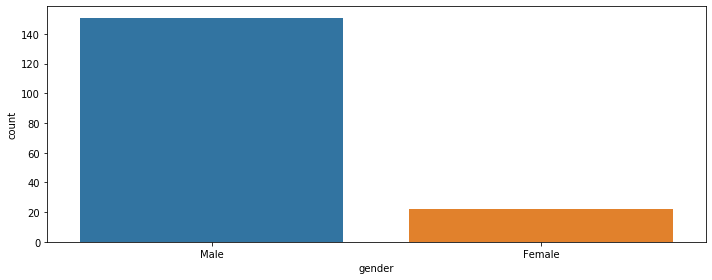

In [25]:
# the breakdown for gender for cleveland-stop-and-search from the month of july 2020 t0 Apr2021
#ax = sns.countplot(x="gender", data=df)

#plt.show()

def func3(data3):
    ax = sns.countplot(x="gender", data=df)

    plt.show()
    return 
func3(df)



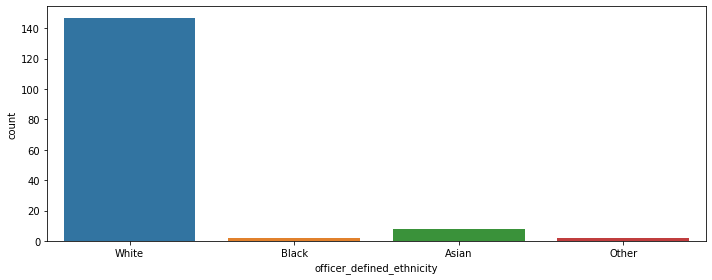

In [26]:
#breakdown for officer defiebed ethnicity cleveland-stop-and-search from the month of july 2020 t0 Apr2021
#ax = sns.countplot(x="officer_defined_ethnicity", data=df)

#plt.show()



def func4(data4):
    ax = sns.countplot(x="officer_defined_ethnicity", data=data4)

    plt.show()
    return 
func4(df)

    

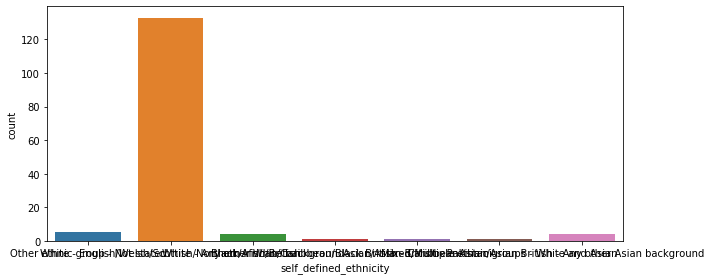

In [27]:
#breakdown for officer defiebed ethnicity cleveland-stop-and-search from the month of july 2020 t0 Apr2021
#ax = sns.countplot(x="self_defined_ethnicity", data=df)

#plt.show()


#self_defined_ethnicity

def func5(data5):
    ax = sns.countplot(x="self_defined_ethnicity", data=df)

    plt.show()
    return
func5(df)
